In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [85]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [91]:
%cd '/content/drive/MyDrive/ASSESSMENT'

/content/drive/MyDrive/ASSESSMENT


In [93]:
%ls

combined_output.csv             Dongsi.csv   Huairou.csv
Combined_Stations_with_AQI.csv  Gucheng.csv  Wanliu.csv


# **MERGING CSV FILES**

> Add blockquote



MERGING CSV. FILES

In [95]:
import pandas as pd
import glob

# === List of your CSV file names ===
csv_files = ["Wanliu.csv", "Huairou.csv", "Gucheng.csv", "Dongsi.csv",]

# === Read and concatenate them ===
df_combined = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

# === Save to a new CSV ===
df_combined.to_csv("combined_output.csv", index=False)

print("CSV files combined and saved as 'combined_output.csv'")


CSV files combined and saved as 'combined_output.csv'


#CALCULATING THE AQI


In [96]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return 0  # Return 0 instead of None

def classify_aqi(aqi):
    if pd.isna(aqi) or aqi < 0 or aqi > 500:
        return ("Invalid", "Gray", "Invalid AQI value")
    elif aqi <= 50:
        return ("Good", "Green", "Air quality is satisfactory.")
    elif aqi <= 100:
        return ("Moderate", "Yellow", "Acceptable; some pollutants may affect sensitive individuals.")
    elif aqi <= 150:
        return ("Unhealthy for Sensitive Groups", "Orange", "Sensitive people may experience health effects.")
    elif aqi <= 200:
        return ("Unhealthy", "Red", "Everyone may begin to experience health effects.")
    elif aqi <= 300:
        return ("Very Unhealthy", "Purple", "Health alert: serious effects for everyone.")
    else:
        return ("Hazardous", "Maroon", "Emergency conditions: serious risk to health for everyone.")

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)

    if individual_aqi and all(val is None for val in individual_aqi.values()):
        overall_aqi = None
    else:
        overall_aqi = max(val for val in individual_aqi.values() if val is not None) if individual_aqi else None

    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI and Bucket row by row ===
aqi_values = []
aqi_buckets = []
aqi_colors = []
aqi_messages = []

for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    bucket, color, message = classify_aqi(overall_aqi)

    aqi_values.append(overall_aqi)
    aqi_buckets.append(bucket)
    aqi_colors.append(color)
    aqi_messages.append(message)

# === Add results to DataFrame and save ===
df['AQI'] = aqi_values
df['AQI_Bucket'] = aqi_buckets
df['AQI_Color'] = aqi_colors
df['AQI_Message'] = aqi_messages

df.to_csv("Combined_Stations_with_AQI.csv", index=False)
print("AQI, categories, colors, and messages saved to 'Combined_Stations_with_AQI.csv'")

AQI, categories, colors, and messages saved to 'Combined_Stations_with_AQI.csv'


# READING DATASET

In [97]:
All_Stations_df = pd.read_csv('Combined_Stations_with_AQI.csv')# Replaced with the name of the file
All_Stations_df


 # shows the first 5 and last 5 rows together

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
0           1  2013      3    1     0    8.0   8.0   6.0  28.0   400.0  ...   
1           2  2013      3    1     1    9.0   9.0   6.0  28.0   400.0  ...   
2           3  2013      3    1     2    3.0   6.0   NaN  19.0   400.0  ...   
3           4  2013      3    1     3   11.0  30.0   8.0  14.0     NaN  ...   
4           5  2013      3    1     4    3.0  13.0   9.0   NaN   300.0  ...   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...     ...  ...   
140251  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
140252  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
140253  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
140254  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
140255  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

          PRES  DEWP  RAIN   wd  WSPM station    AQI  \
0       1023.0 -18.8   0.0  NNW   4.4  Wanliu   48.0   
1       1023.2 -18.2   0.0    N   4.7  Wanliu   46.0   
2       1023.5 -18.2   0.0  NNW   5.6  Wanliu   51.0   
3       1024.5 -19.4   0.0   NW   3.1  Wanliu   46.0   
4       1025.2 -19.5   0.0    N   2.0  Wanliu   50.0   
...        ...   ...   ...  ...   ...     ...    ...   
140251  1013.5 -16.2   0.0   NW   2.4  Dongsi  108.0   
140252  1013.6 -15.1   0.0  WNW   0.9  Dongsi   63.0   
140253  1014.2 -13.3   0.0   NW   1.1  Dongsi   74.0   
140254  1014.4 -12.9   0.0  NNW   1.2  Dongsi   74.0   
140255  1014.1 -15.9   0.0  NNE   1.3  Dongsi   89.0   

                            AQI_Bucket  AQI_Color  \
0                                 Good      Green   
1                                 Good      Green   
2                             Moderate     Yellow   
3                                 Good      Green   
4                                 Good      Green   
...                                ...        ...   
140251  Unhealthy for Sensitive Groups     Orange   
140252                        Moderate     Yellow   
140253                        Moderate     Yellow   
140254                        Moderate     Yellow   
140255                        Moderate     Yellow   

                                              AQI_Message  
0                            Air quality is satisfactory.  
1                            Air quality is satisfactory.  
2       Acceptable; some pollutants may affect sensiti...  
3                            Air quality is satisfactory.  
4                            Air quality is satisfactory.  
...                                                   ...  
140251    Sensitive people may experience health effects.  
140252  Acceptable; some pollutants may affect sensiti...  
140253  Acceptable; some pollutants may affect sensiti...  
140254  Acceptable; some pollutants may affect sensiti...  
140255  Acceptable; some pollutants may affect sensiti...  

[140256 rows x 22 columns]

In [98]:
All_Stations_df.head()#shows first 5 rows

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...    PRES  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  ...  1023.0   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  ...  1023.2   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  ...  1023.5   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN  ...  1024.5   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  ...  1025.2   

   DEWP  RAIN   wd  WSPM station   AQI AQI_Bucket  AQI_Color  \
0 -18.8   0.0  NNW   4.4  Wanliu  48.0       Good      Green   
1 -18.2   0.0    N   4.7  Wanliu  46.0       Good      Green   
2 -18.2   0.0  NNW   5.6  Wanliu  51.0   Moderate     Yellow   
3 -19.4   0.0   NW   3.1  Wanliu  46.0       Good      Green   
4 -19.5   0.0    N   2.0  Wanliu  50.0       Good      Green   

                                         AQI_Message  
0                       Air quality is satisfactory.  
1                       Air quality is satisfactory.  
2  Acceptable; some pollutants may affect sensiti...  
3                       Air quality is satisfactory.  
4                       Air quality is satisfactory.  

[5 rows x 22 columns]

In [100]:
All_Stations_df.tail()#shows last 5 rows

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
140251  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
140252  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
140253  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
140254  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
140255  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

          PRES  DEWP  RAIN   wd  WSPM station    AQI  \
140251  1013.5 -16.2   0.0   NW   2.4  Dongsi  108.0   
140252  1013.6 -15.1   0.0  WNW   0.9  Dongsi   63.0   
140253  1014.2 -13.3   0.0   NW   1.1  Dongsi   74.0   
140254  1014.4 -12.9   0.0  NNW   1.2  Dongsi   74.0   
140255  1014.1 -15.9   0.0  NNE   1.3  Dongsi   89.0   

                            AQI_Bucket  AQI_Color  \
140251  Unhealthy for Sensitive Groups     Orange   
140252                        Moderate     Yellow   
140253                        Moderate     Yellow   
140254                        Moderate     Yellow   
140255                        Moderate     Yellow   

                                              AQI_Message  
140251    Sensitive people may experience health effects.  
140252  Acceptable; some pollutants may affect sensiti...  
140253  Acceptable; some pollutants may affect sensiti...  
140254  Acceptable; some pollutants may affect sensiti...  
140255  Acceptable; some pollutants may affect sensiti...  

[5 rows x 22 columns]

# Exploratory Data Analysis

Step 2: **Understand the Data Structure**

In [99]:
All_Stations_df.shape

(140256, 22)

In [101]:
All_Stations_df.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station',
       'AQI', 'AQI_Bucket', 'AQI_Color', 'AQI_Message'],
      dtype='object')

In [102]:
All_Stations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 22 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   No           140256 non-null  int64  
 1   year         140256 non-null  int64  
 2   month        140256 non-null  int64  
 3   day          140256 non-null  int64  
 4   hour         140256 non-null  int64  
 5   PM2.5        137525 non-null  float64
 6   PM10         138261 non-null  float64
 7   SO2          137531 non-null  float64
 8   NO2          135278 non-null  float64
 9   CO           132424 non-null  float64
 10  O3           135605 non-null  float64
 11  TEMP         140114 non-null  float64
 12  PRES         140113 non-null  float64
 13  DEWP         140112 non-null  float64
 14  RAIN         140118 non-null  float64
 15  wd           139594 non-null  object 
 16  WSPM         140137 non-null  float64
 17  station      140256 non-null  object 
 18  AQI          138656 non-

In [103]:
All_Stations_df.isnull().sum()

No                0
year              0
month             0
day               0
hour              0
PM2.5          2731
PM10           1995
SO2            2725
NO2            4978
CO             7832
O3             4651
TEMP            142
PRES            143
DEWP            144
RAIN            138
wd              662
WSPM            119
station           0
AQI            1600
AQI_Bucket        0
AQI_Color         0
AQI_Message       0
dtype: int64

In [104]:
All_Stations_df.describe()

No           year          month            day           hour  \
count  140256.000  140256.000000  140256.000000  140256.000000  140256.000000   
mean    17532.500    2014.662560       6.522930      15.729637      11.500000   
std     10122.141       1.177201       3.448715       8.800123       6.922211   
min         1.000    2013.000000       1.000000       1.000000       0.000000   
25%      8766.750    2014.000000       4.000000       8.000000       5.750000   
50%     17532.500    2015.000000       7.000000      16.000000      11.500000   
75%     26298.250    2016.000000      10.000000      23.000000      17.250000   
max     35064.000    2017.000000      12.000000      31.000000      23.000000   

               PM2.5           PM10            SO2            NO2  \
count  137525.000000  138261.000000  137531.000000  135278.000000   
mean       80.787633     107.831910      16.108619      51.917635   
std        81.104627      93.499284      21.627111      36.087915   
min         2.000000       2.000000       0.285600       1.026500   
25%        21.000000      37.000000       2.856000      23.000000   
50%        56.000000      86.000000       8.000000      45.000000   
75%       112.000000     151.000000      20.000000      73.497400   
max       957.000000     994.000000     500.000000     276.000000   

                  CO             O3           TEMP           PRES  \
count  132424.000000  135605.000000  140114.000000  140113.000000   
mean     1247.705756      55.960789      13.352664    1010.019103   
std      1157.289263      56.377926      11.476537      10.367816   
min       100.000000       0.214200     -19.900000     982.800000   
25%       500.000000      10.000000       3.000000    1001.600000   
50%       900.000000      43.000000      14.300000    1009.700000   
75%      1500.000000      80.000000      23.100000    1018.200000   
max     10000.000000    1071.000000      41.600000    1042.000000   

                DEWP           RAIN           WSPM            AQI  
count  140112.000000  140118.000000  140137.000000  138656.000000  
mean        2.640897       0.066169       1.589366     167.612112  
std        13.836908       0.843583       1.200826      83.396485  
min       -43.400000       0.000000       0.000000       3.000000  
25%        -8.900000       0.000000       0.800000     102.000000  
50%         3.200000       0.000000       1.300000     164.000000  
75%        15.400000       0.000000       2.100000     210.000000  
max        29.100000      72.500000      12.900000     500.000000

In [105]:
All_Stations_df.describe(include=['object'])

wd station AQI_Bucket AQI_Color  \
count   139594  140256     140256    140256   
unique      16       4          7         7   
top         NE  Wanliu  Unhealthy       Red   
freq     15614   35064      44947     44947   

                                             AQI_Message  
count                                             140256  
unique                                                 7  
top     Everyone may begin to experience health effects.  
freq                                               44947

# **DATA CLEANING**

In [107]:
#Handle missing values:
#Drop rows (if needed):
Cleaned_df = All_Stations_df.dropna()
display(Cleaned_df)

No  year  month  day  hour  PM2.5  PM10   SO2   NO2      CO  ...  \
0           1  2013      3    1     0    8.0   8.0   6.0  28.0   400.0  ...   
1           2  2013      3    1     1    9.0   9.0   6.0  28.0   400.0  ...   
5           6  2013      3    1     5    3.0   6.0   8.0  17.0   300.0  ...   
6           7  2013      3    1     6    3.0   3.0  10.0  21.0   300.0  ...   
7           8  2013      3    1     7    3.0   6.0  11.0  26.0   300.0  ...   
...       ...   ...    ...  ...   ...    ...   ...   ...   ...     ...  ...   
140251  35060  2017      2   28    19   16.0  51.0   3.0  29.0   400.0  ...   
140252  35061  2017      2   28    20   18.0  45.0   3.0  43.0   500.0  ...   
140253  35062  2017      2   28    21   23.0  58.0   5.0  61.0   700.0  ...   
140254  35063  2017      2   28    22   23.0  53.0   9.0  75.0   900.0  ...   
140255  35064  2017      2   28    23   30.0  71.0  11.0  87.0  1200.0  ...   

          PRES  DEWP  RAIN   wd  WSPM station    AQI  \
0       1023.0 -18.8   0.0  NNW   4.4  Wanliu   48.0   
1       1023.2 -18.2   0.0    N   4.7  Wanliu   46.0   
5       1025.6 -19.6   0.0    N   3.7  Wanliu   50.0   
6       1026.5 -19.1   0.0  NNE   2.5  Wanliu   48.0   
7       1027.4 -19.1   0.0  NNW   3.8  Wanliu   44.0   
...        ...   ...   ...  ...   ...     ...    ...   
140251  1013.5 -16.2   0.0   NW   2.4  Dongsi  108.0   
140252  1013.6 -15.1   0.0  WNW   0.9  Dongsi   63.0   
140253  1014.2 -13.3   0.0   NW   1.1  Dongsi   74.0   
140254  1014.4 -12.9   0.0  NNW   1.2  Dongsi   74.0   
140255  1014.1 -15.9   0.0  NNE   1.3  Dongsi   89.0   

                            AQI_Bucket  AQI_Color  \
0                                 Good      Green   
1                                 Good      Green   
5                                 Good      Green   
6                                 Good      Green   
7                                 Good      Green   
...                                ...        ...   
140251  Unhealthy for Sensitive Groups     Orange   
140252                        Moderate     Yellow   
140253                        Moderate     Yellow   
140254                        Moderate     Yellow   
140255                        Moderate     Yellow   

                                              AQI_Message  
0                            Air quality is satisfactory.  
1                            Air quality is satisfactory.  
5                            Air quality is satisfactory.  
6                            Air quality is satisfactory.  
7                            Air quality is satisfactory.  
...                                                   ...  
140251    Sensitive people may experience health effects.  
140252  Acceptable; some pollutants may affect sensiti...  
140253  Acceptable; some pollutants may affect sensiti...  
140254  Acceptable; some pollutants may affect sensiti...  
140255  Acceptable; some pollutants may affect sensiti...  

[125184 rows x 22 columns]

In [108]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

**FINDING NUMBER OF CITIES IN THE DATASET**

In [116]:
cities = All_Stations_df['station'].value_counts()
print(f'Total number of cities in the dataset : {len(cities)}')
cities

Total number of cities in the dataset : 4


station
Wanliu     35064
Huairou    35064
Gucheng    35064
Dongsi     35064
Name: count, dtype: int64

**CREATING A COLUMN DATE AND CONVERTING TO YY/MM/DD**

In [117]:
All_Stations_df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
All_Stations_df['Date']

0        2013-03-01
1        2013-03-01
2        2013-03-01
3        2013-03-01
4        2013-03-01
            ...    
140251   2017-02-28
140252   2017-02-28
140253   2017-02-28
140254   2017-02-28
140255   2017-02-28
Name: Date, Length: 140256, dtype: datetime64[ns]

In [119]:
All_Stations_df['Date'] = pd.to_datetime(All_Stations_df['Date'])

All_Stations_df['month']=pd.DatetimeIndex(All_Stations_df['Date']).month #making a new column by extracting month part of the Date column in cities dataframe
All_Stations_df['Year']=pd.DatetimeIndex(All_Stations_df['Date']).year #

In [120]:
All_Stations_df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...  RAIN   wd  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  ...   0.0  NNW   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  ...   0.0    N   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  ...   0.0  NNW   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN  ...   0.0   NW   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  ...   0.0    N   

   WSPM  station   AQI AQI_Bucket  AQI_Color  \
0   4.4   Wanliu  48.0       Good      Green   
1   4.7   Wanliu  46.0       Good      Green   
2   5.6   Wanliu  51.0   Moderate     Yellow   
3   3.1   Wanliu  46.0       Good      Green   
4   2.0   Wanliu  50.0       Good      Green   

                                         AQI_Message       Date  Year  
0                       Air quality is satisfactory. 2013-03-01  2013  
1                       Air quality is satisfactory. 2013-03-01  2013  
2  Acceptable; some pollutants may affect sensiti... 2013-03-01  2013  
3                       Air quality is satisfactory. 2013-03-01  2013  
4                       Air quality is satisfactory. 2013-03-01  2013  

[5 rows x 24 columns]

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 24 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   No           140256 non-null  int64         
 1   year         140256 non-null  int64         
 2   month        140256 non-null  int32         
 3   day          140256 non-null  int64         
 4   hour         140256 non-null  int64         
 5   PM2.5        137525 non-null  float64       
 6   PM10         138261 non-null  float64       
 7   SO2          137531 non-null  float64       
 8   NO2          135278 non-null  float64       
 9   CO           132424 non-null  float64       
 10  O3           135605 non-null  float64       
 11  TEMP         140114 non-null  float64       
 12  PRES         140113 non-null  float64       
 13  DEWP         140112 non-null  float64       
 14  RAIN         140118 non-null  float64       
 15  wd           139594 non-null  obje

**LOOKING AT MISSING VALUES**

In [122]:
# Missing values
def missing_values_table(All_Stations_df):
        # Total missing values
        mis_val = All_Stations_df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 *  All_Stations_df.isnull().sum() / len(df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        print(mis_val_table)

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table( All_Stations_df)
missing_values.style.background_gradient(cmap='Blues')

                0         1
No              0  0.000000
year            0  0.000000
month           0  0.000000
day             0  0.000000
hour            0  0.000000
PM2.5        2731  1.947154
PM10         1995  1.422399
SO2          2725  1.942876
NO2          4978  3.549224
CO           7832  5.584075
O3           4651  3.316079
TEMP          142  0.101243
PRES          143  0.101956
DEWP          144  0.102669
RAIN          138  0.098392
wd            662  0.471994
WSPM          119  0.084845
station         0  0.000000
AQI          1600  1.140771
AQI_Bucket      0  0.000000
AQI_Color       0  0.000000
AQI_Message     0  0.000000
Date            0  0.000000
Year            0  0.000000


In [123]:
df['PM2.5']=df['PM2.5']
df['PM10']= df['PM10']
df['Nitrous Dioxide']=df['NO2']
df['Carbon Monoxide']=df['CO']
df['Sulphur Dioxide']=df['SO2']
df['Ozone']=df['O3']
df.head()

No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO  ...   AQI  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  ...  48.0   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  ...  46.0   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  ...  51.0   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN  ...  46.0   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  ...  50.0   

   AQI_Bucket  AQI_Color                                        AQI_Message  \
0        Good      Green                       Air quality is satisfactory.   
1        Good      Green                       Air quality is satisfactory.   
2    Moderate     Yellow  Acceptable; some pollutants may affect sensiti...   
3        Good      Green                       Air quality is satisfactory.   
4        Good      Green                       Air quality is satisfactory.   

        Date  Year  Nitrous Dioxide Carbon Monoxide  Sulphur Dioxide Ozone  
0 2013-03-01  2013             28.0           400.0              6.0  52.0  
1 2013-03-01  2013             28.0           400.0              6.0  50.0  
2 2013-03-01  2013             19.0           400.0              NaN  55.0  
3 2013-03-01  2013             14.0             NaN              8.0   NaN  
4 2013-03-01  2013              NaN           300.0              9.0  54.0  

[5 rows x 28 columns]

**CREATING NEW DATAFRAME WITH AIR QUALITIES**

In [146]:
selected_columns = ['station', 'Date', 'month', 'year','PM2.5','PM10', 'SO2','NO2', 'CO', 'O3','TEMP','DEWP','PRES','RAIN','WSPM','AQI','AQI_Bucket','AQI_Color','AQI_Message']

# Create a new DataFrame with only the selected columns
New_df = df[selected_columns]

# Display the first few rows of the new DataFrame
New_df.head()

station       Date  month  year  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0  Wanliu 2013-03-01      3  2013    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1  Wanliu 2013-03-01      3  2013    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2  Wanliu 2013-03-01      3  2013    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3  Wanliu 2013-03-01      3  2013   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4  Wanliu 2013-03-01      3  2013    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

   DEWP    PRES  RAIN  WSPM   AQI AQI_Bucket AQI_Color  \
0 -18.8  1023.0   0.0   4.4  48.0       Good     Green   
1 -18.2  1023.2   0.0   4.7  46.0       Good     Green   
2 -18.2  1023.5   0.0   5.6  51.0   Moderate    Yellow   
3 -19.4  1024.5   0.0   3.1  46.0       Good     Green   
4 -19.5  1025.2   0.0   2.0  50.0       Good     Green   

                                         AQI_Message  
0                       Air quality is satisfactory.  
1                       Air quality is satisfactory.  
2  Acceptable; some pollutants may affect sensiti...  
3                       Air quality is satisfactory.  
4                       Air quality is satisfactory.

In [147]:
New_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140256 entries, 0 to 140255
Data columns (total 19 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   station      140256 non-null  object        
 1   Date         140256 non-null  datetime64[ns]
 2   month        140256 non-null  int32         
 3   year         140256 non-null  int64         
 4   PM2.5        137525 non-null  float64       
 5   PM10         138261 non-null  float64       
 6   SO2          137531 non-null  float64       
 7   NO2          135278 non-null  float64       
 8   CO           132424 non-null  float64       
 9   O3           135605 non-null  float64       
 10  TEMP         140114 non-null  float64       
 11  DEWP         140112 non-null  float64       
 12  PRES         140113 non-null  float64       
 13  RAIN         140118 non-null  float64       
 14  WSPM         140137 non-null  float64       
 15  AQI          138656 non-null  floa

**CHECKING MISSING VALUES FOR THE NEW DATAFRAME WITH SESLECTED COLUMNS**

In [148]:
# Missing values
def missing_values_table(New_df):
        # Total missing values
        mis_val = New_df.isnull().sum()

        # Percentage of missing values
        mis_val_percent = 100 * New_df.isnull().sum() / len(New_df)

        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table

        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})

        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns.sort_values(
        '% of Total Values', ascending=False)

        # Return the dataframe with missing information
        return mis_val_table_ren_columns

missing_values= missing_values_table(New_df)
missing_values.style.background_gradient(cmap='Greens')

**IMPUTING MISSING VALUES**


**Mean** :
Finding the mean and replacing missing values with the mean


In [149]:
AirQualities= ['PM2.5','PM10','SO2','NO2', 'CO', 'O3','TEMP','DEWP','PRES','RAIN','WSPM','AQI']
AirQualities_df= New_df.groupby(['year','month','station'])[AirQualities].mean().reset_index()
AirQualities_df

year  month  station       PM2.5        PM10        SO2        NO2  \
0    2013      3   Dongsi  108.432032  131.022911  39.831952  76.904376   
1    2013      3  Gucheng  108.841398  146.453315  38.202755  76.913542   
2    2013      3  Huairou   98.299169  117.998650  33.073560  51.701720   
3    2013      3   Wanliu  110.272849  145.587162  43.533330  88.493135   
4    2013      4   Dongsi   65.273992   98.572222  22.404388  43.961095   
..    ...    ...      ...         ...         ...        ...        ...   
187  2017      1   Wanliu  115.932432  133.454054  20.237197  75.056604   
188  2017      2   Dongsi   76.538103  103.195122  19.607634  51.419847   
189  2017      2  Gucheng   72.859112   98.201835  19.623077  54.538222   
190  2017      2  Huairou   58.036474   72.569697  10.316109  35.940819   
191  2017      2   Wanliu   69.737082   85.606980  20.370821  62.329787   

              CO         O3       TEMP       DEWP         PRES      RAIN  \
0    1529.192616  59.489526   6.256989  -7.030511  1014.456855  0.020968   
1    1624.285513  59.124166   6.329032  -6.514785  1010.526075  0.020161   
2    1202.575071  61.879593   4.819624  -7.575000  1009.515188  0.017473   
3    1684.334795  39.668154   6.053629  -5.729435  1012.547446  0.026210   
4     966.527697  69.612200  12.632361  -3.778056  1009.933056  0.012222   
..           ...        ...        ...        ...          ...       ...   
187  2143.895748  30.475034  -1.267553 -12.931105  1024.507572  0.000136   
188  1183.128834  44.651908   2.661533 -13.627679  1022.020585  0.006101   
189  1292.735703  33.124043   2.365717 -14.643006  1018.290179  0.005804   
190  1028.353659  58.382040   0.859921 -13.763542  1016.851488  0.006845   
191  1310.703364  41.695586   2.256324 -13.190625  1020.446032  0.006101   

         WSPM         AQI  
0    1.969624  191.382234  
1    1.427554  190.342742  
2    2.030511  179.905914  
3    1.997849  178.142473  
4    2.571389  171.512500  
..        ...         ...  
187  1.889824  174.025572  
188  1.953869  151.254573  
189  2.072768  132.509174  
190  2.037798  157.724242  
191  1.735565  151.833080  

[192 rows x 15 columns]

In [150]:
New_df['PM2.5']=New_df['PM2.5'].fillna((New_df['PM2.5'].median()))
New_df['PM10']=New_df['PM10'].fillna((New_df['PM10'].median()))
New_df['SO2']=New_df['SO2'].fillna((New_df['SO2'].median()))
New_df['NO2']=New_df['NO2'].fillna((New_df['NO2'].median()))
New_df['CO']=New_df['CO'].fillna((New_df['CO'].median()))
New_df['O3']=New_df['O3'].fillna((New_df['O3'].median()))
New_df['AQI']=New_df['AQI'].fillna((New_df['AQI'].median()))
New_df['TEMP']=New_df['TEMP'].fillna((New_df['TEMP'].median()))
New_df['RAIN']=New_df['RAIN'].fillna((New_df['RAIN'].median()))
New_df['PRES']=New_df['PRES'].fillna((New_df['PRES'].median()))
New_df['DEWP']=New_df['DEWP'].fillna((New_df['DEWP'].median()))
New_df['WSPM']=New_df['WSPM'].fillna((New_df['WSPM'].median()))

In [151]:
New_df

station       Date  month  year  PM2.5  PM10   SO2   NO2      CO    O3  \
0       Wanliu 2013-03-01      3  2013    8.0   8.0   6.0  28.0   400.0  52.0   
1       Wanliu 2013-03-01      3  2013    9.0   9.0   6.0  28.0   400.0  50.0   
2       Wanliu 2013-03-01      3  2013    3.0   6.0   8.0  19.0   400.0  55.0   
3       Wanliu 2013-03-01      3  2013   11.0  30.0   8.0  14.0   900.0  43.0   
4       Wanliu 2013-03-01      3  2013    3.0  13.0   9.0  45.0   300.0  54.0   
...        ...        ...    ...   ...    ...   ...   ...   ...     ...   ...   
140251  Dongsi 2017-02-28      2  2017   16.0  51.0   3.0  29.0   400.0  73.0   
140252  Dongsi 2017-02-28      2  2017   18.0  45.0   3.0  43.0   500.0  54.0   
140253  Dongsi 2017-02-28      2  2017   23.0  58.0   5.0  61.0   700.0  28.0   
140254  Dongsi 2017-02-28      2  2017   23.0  53.0   9.0  75.0   900.0  15.0   
140255  Dongsi 2017-02-28      2  2017   30.0  71.0  11.0  87.0  1200.0   4.0   

        TEMP  DEWP    PRES  RAIN  WSPM    AQI                      AQI_Bucket  \
0       -0.7 -18.8  1023.0   0.0   4.4   48.0                            Good   
1       -1.1 -18.2  1023.2   0.0   4.7   46.0                            Good   
2       -1.1 -18.2  1023.5   0.0   5.6   51.0                        Moderate   
3       -1.4 -19.4  1024.5   0.0   3.1   46.0                            Good   
4       -2.0 -19.5  1025.2   0.0   2.0   50.0                            Good   
...      ...   ...     ...   ...   ...    ...                             ...   
140251  12.5 -16.2  1013.5   0.0   2.4  108.0  Unhealthy for Sensitive Groups   
140252  11.6 -15.1  1013.6   0.0   0.9   63.0                        Moderate   
140253  10.8 -13.3  1014.2   0.0   1.1   74.0                        Moderate   
140254  10.5 -12.9  1014.4   0.0   1.2   74.0                        Moderate   
140255   8.6 -15.9  1014.1   0.0   1.3   89.0                        Moderate   

       AQI_Color                                        AQI_Message  
0          Green                       Air quality is satisfactory.  
1          Green                       Air quality is satisfactory.  
2         Yellow  Acceptable; some pollutants may affect sensiti...  
3          Green                       Air quality is satisfactory.  
4          Green                       Air quality is satisfactory.  
...          ...                                                ...  
140251    Orange    Sensitive people may experience health effects.  
140252    Yellow  Acceptable; some pollutants may affect sensiti...  
140253    Yellow  Acceptable; some pollutants may affect sensiti...  
140254    Yellow  Acceptable; some pollutants may affect sensiti...  
140255    Yellow  Acceptable; some pollutants may affect sensiti...  

[140256 rows x 19 columns]

In [152]:
New_df.describe().T

count                           mean                  min  \
Date     140256  2015-02-28 23:59:59.999999744  2013-03-01 00:00:00   
month  140256.0                        6.52293                  1.0   
year   140256.0                     2014.66256               2013.0   
PM2.5  140256.0                      80.304979                  2.0   
PM10   140256.0                     107.521373                  2.0   
SO2    140256.0                      15.951079               0.2856   
NO2    140256.0                      51.672113               1.0265   
CO     140256.0                    1228.289606                100.0   
O3     140256.0                      55.530999               0.2142   
TEMP   140256.0                      13.353623                -19.9   
DEWP   140256.0                       2.641471                -43.4   
PRES   140256.0                    1010.018778                982.8   
RAIN   140256.0                       0.066103                  0.0   
WSPM   140256.0                       1.589121                  0.0   
AQI    140256.0                     167.570906                  3.0   

                       25%                  50%                  75%  \
Date   2014-03-01 00:00:00  2015-03-01 00:00:00  2016-02-29 00:00:00   
month                  4.0                  7.0                 10.0   
year                2014.0               2015.0               2016.0   
PM2.5                 22.0                 56.0                111.0   
PM10                  38.0                 86.0                150.0   
SO2                    3.0                  8.0                 20.0   
NO2                   24.0                 45.0                 72.0   
CO                   500.0                900.0               1500.0   
O3                    11.0                 43.0                 79.0   
TEMP                   3.0                 14.3                 23.0   
DEWP                  -8.9                  3.2                 15.4   
PRES                1001.6               1009.7               1018.2   
RAIN                   0.0                  0.0                  0.0   
WSPM                   0.8                  1.3                  2.1   
AQI                  102.0                164.0                209.0   

                       max          std  
Date   2017-02-28 00:00:00          NaN  
month                 12.0     3.448715  
year                2017.0     1.177201  
PM2.5                957.0    80.384125  
PM10                 994.0    92.867921  
SO2                  500.0    21.445211  
NO2                  276.0    35.464808  
CO                 10000.0  1127.343571  
O3                  1071.0    55.483826  
TEMP                  41.6    11.470766  
DEWP                  29.1    13.829815  
PRES                1042.0    10.362535  
RAIN                  72.5      0.84317  
WSPM                  12.9     1.200346  
AQI                  500.0    82.920323

# CREATING A NEW DATAFRAME CONTAINING THE POLLUTANTS ONLY

In [162]:
pollutants = ['PM2.5','PM10','SO2','NO2', 'CO', 'O3','AQI']
Pollutants_df= New_df.groupby(['year','month','station'])[pollutants].mean().reset_index()
Pollutants_df


year  month  station       PM2.5        PM10        SO2        NO2  \
0    2013      3   Dongsi  108.361559  130.901882  39.618028  76.689965   
1    2013      3  Gucheng  108.841398  146.047043  38.080970  74.211185   
2    2013      3  Huairou   97.048387  117.869624  32.972457  51.224313   
3    2013      3   Wanliu  110.272849  145.266801  43.342290  88.142383   
4    2013      4   Dongsi   65.261111   98.572222  22.344370  43.971195   
..    ...    ...      ...         ...         ...        ...        ...   
187  2017      1   Wanliu  115.610215  133.198925  20.204301  74.975806   
188  2017      2   Dongsi   75.651786  102.785714  19.313988  51.257440   
189  2017      2  Gucheng   72.382440   97.875000  19.242560  54.098214   
190  2017      2  Huairou   57.994048   72.809524  10.267857  36.116071   
191  2017      2   Wanliu   69.450893   85.614583  20.113095  61.968750   

              CO         O3         AQI  
0    1426.864247  59.245730  191.345430  
1    1592.159946  59.037477  190.342742  
2    1187.120968  61.778090  179.905914  
3    1621.081989  39.775633  178.142473  
4     963.386111  69.279547  171.512500  
..           ...        ...         ...  
187  2118.817204  30.525538  174.012097  
188  1174.702381  44.610119  151.558036  
189  1278.125000  33.403274  133.352679  
190  1025.297619  58.038690  157.836310  
191  1299.702381  41.724702  152.068452  

[192 rows x 10 columns]

In [164]:
New_df.columns

Index(['station', 'Date', 'month', 'year', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO',
       'O3', 'TEMP', 'DEWP', 'PRES', 'RAIN', 'WSPM', 'AQI', 'AQI_Bucket',
       'AQI_Color', 'AQI_Message'],
      dtype='object')

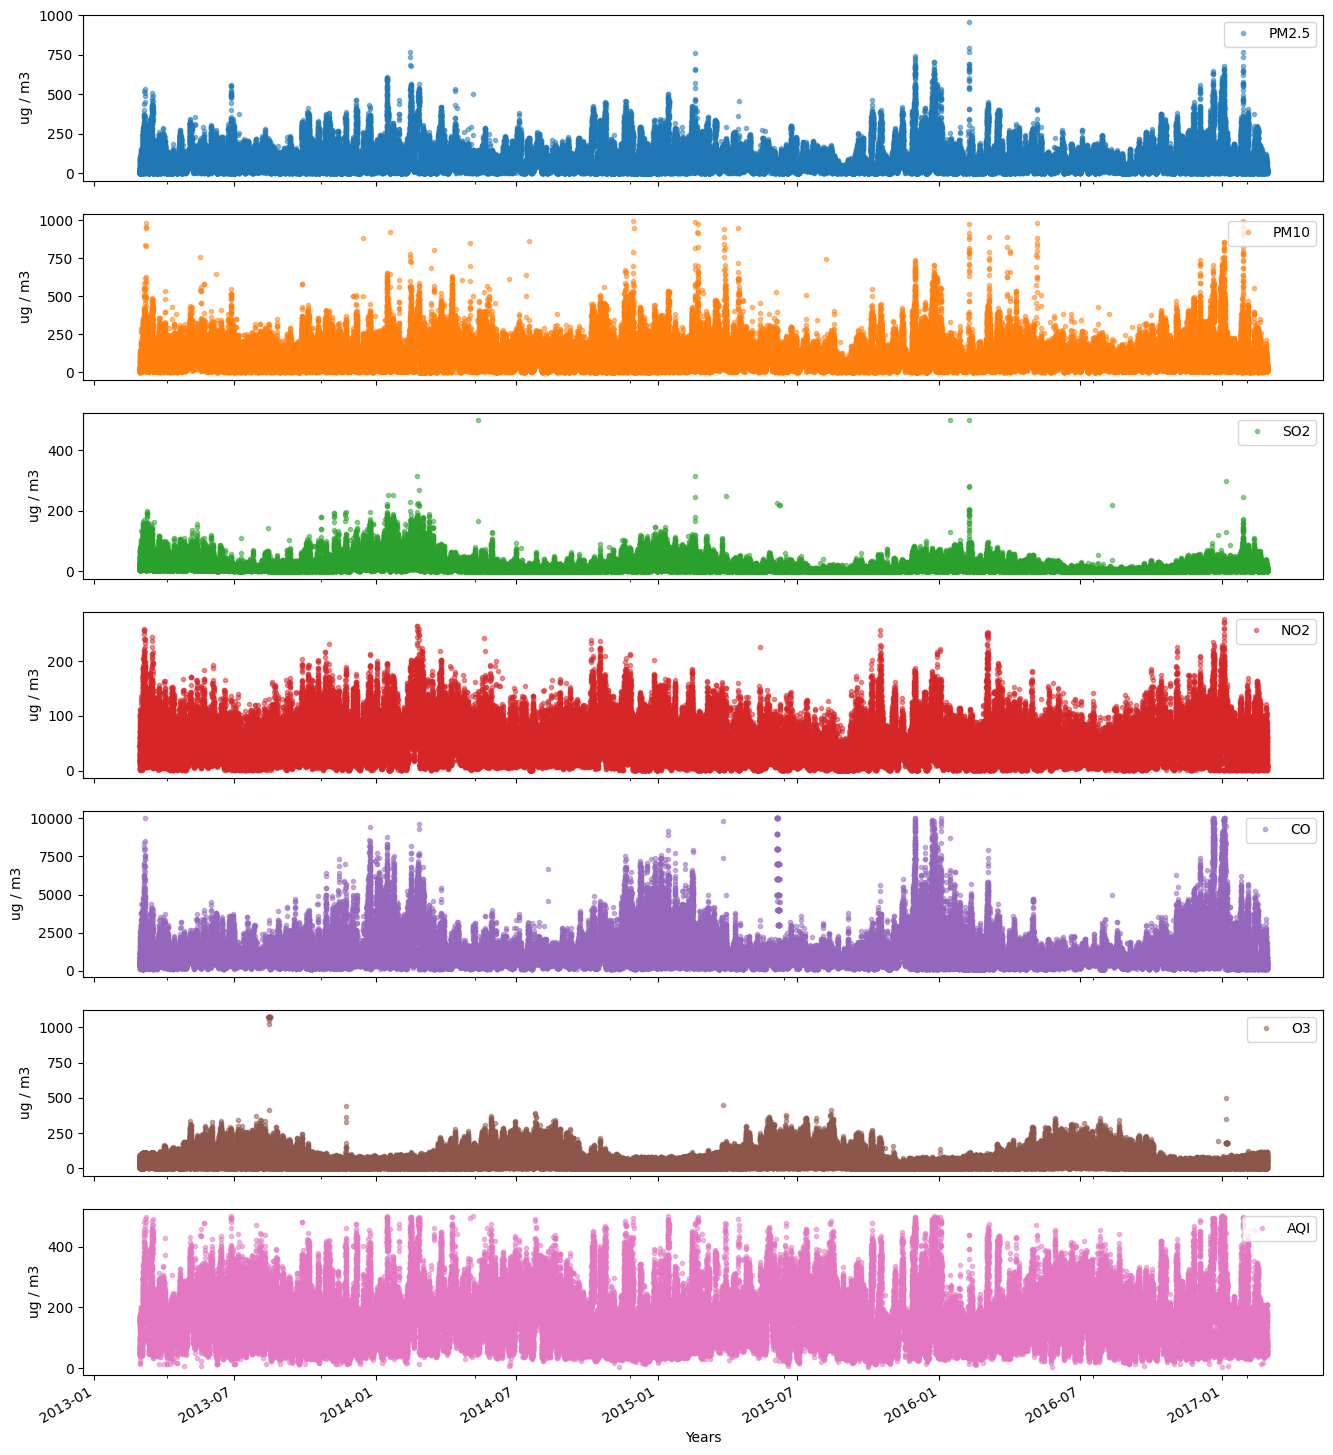

In [165]:
New_df.set_index('Date',inplace=True)
axes = New_df[pollutants].plot(marker='.', alpha=0.5, linestyle='None', figsize=(16, 20), subplots=True)
for ax in axes:

    ax.set_xlabel('Years')
    ax.set_ylabel('ug / m3')

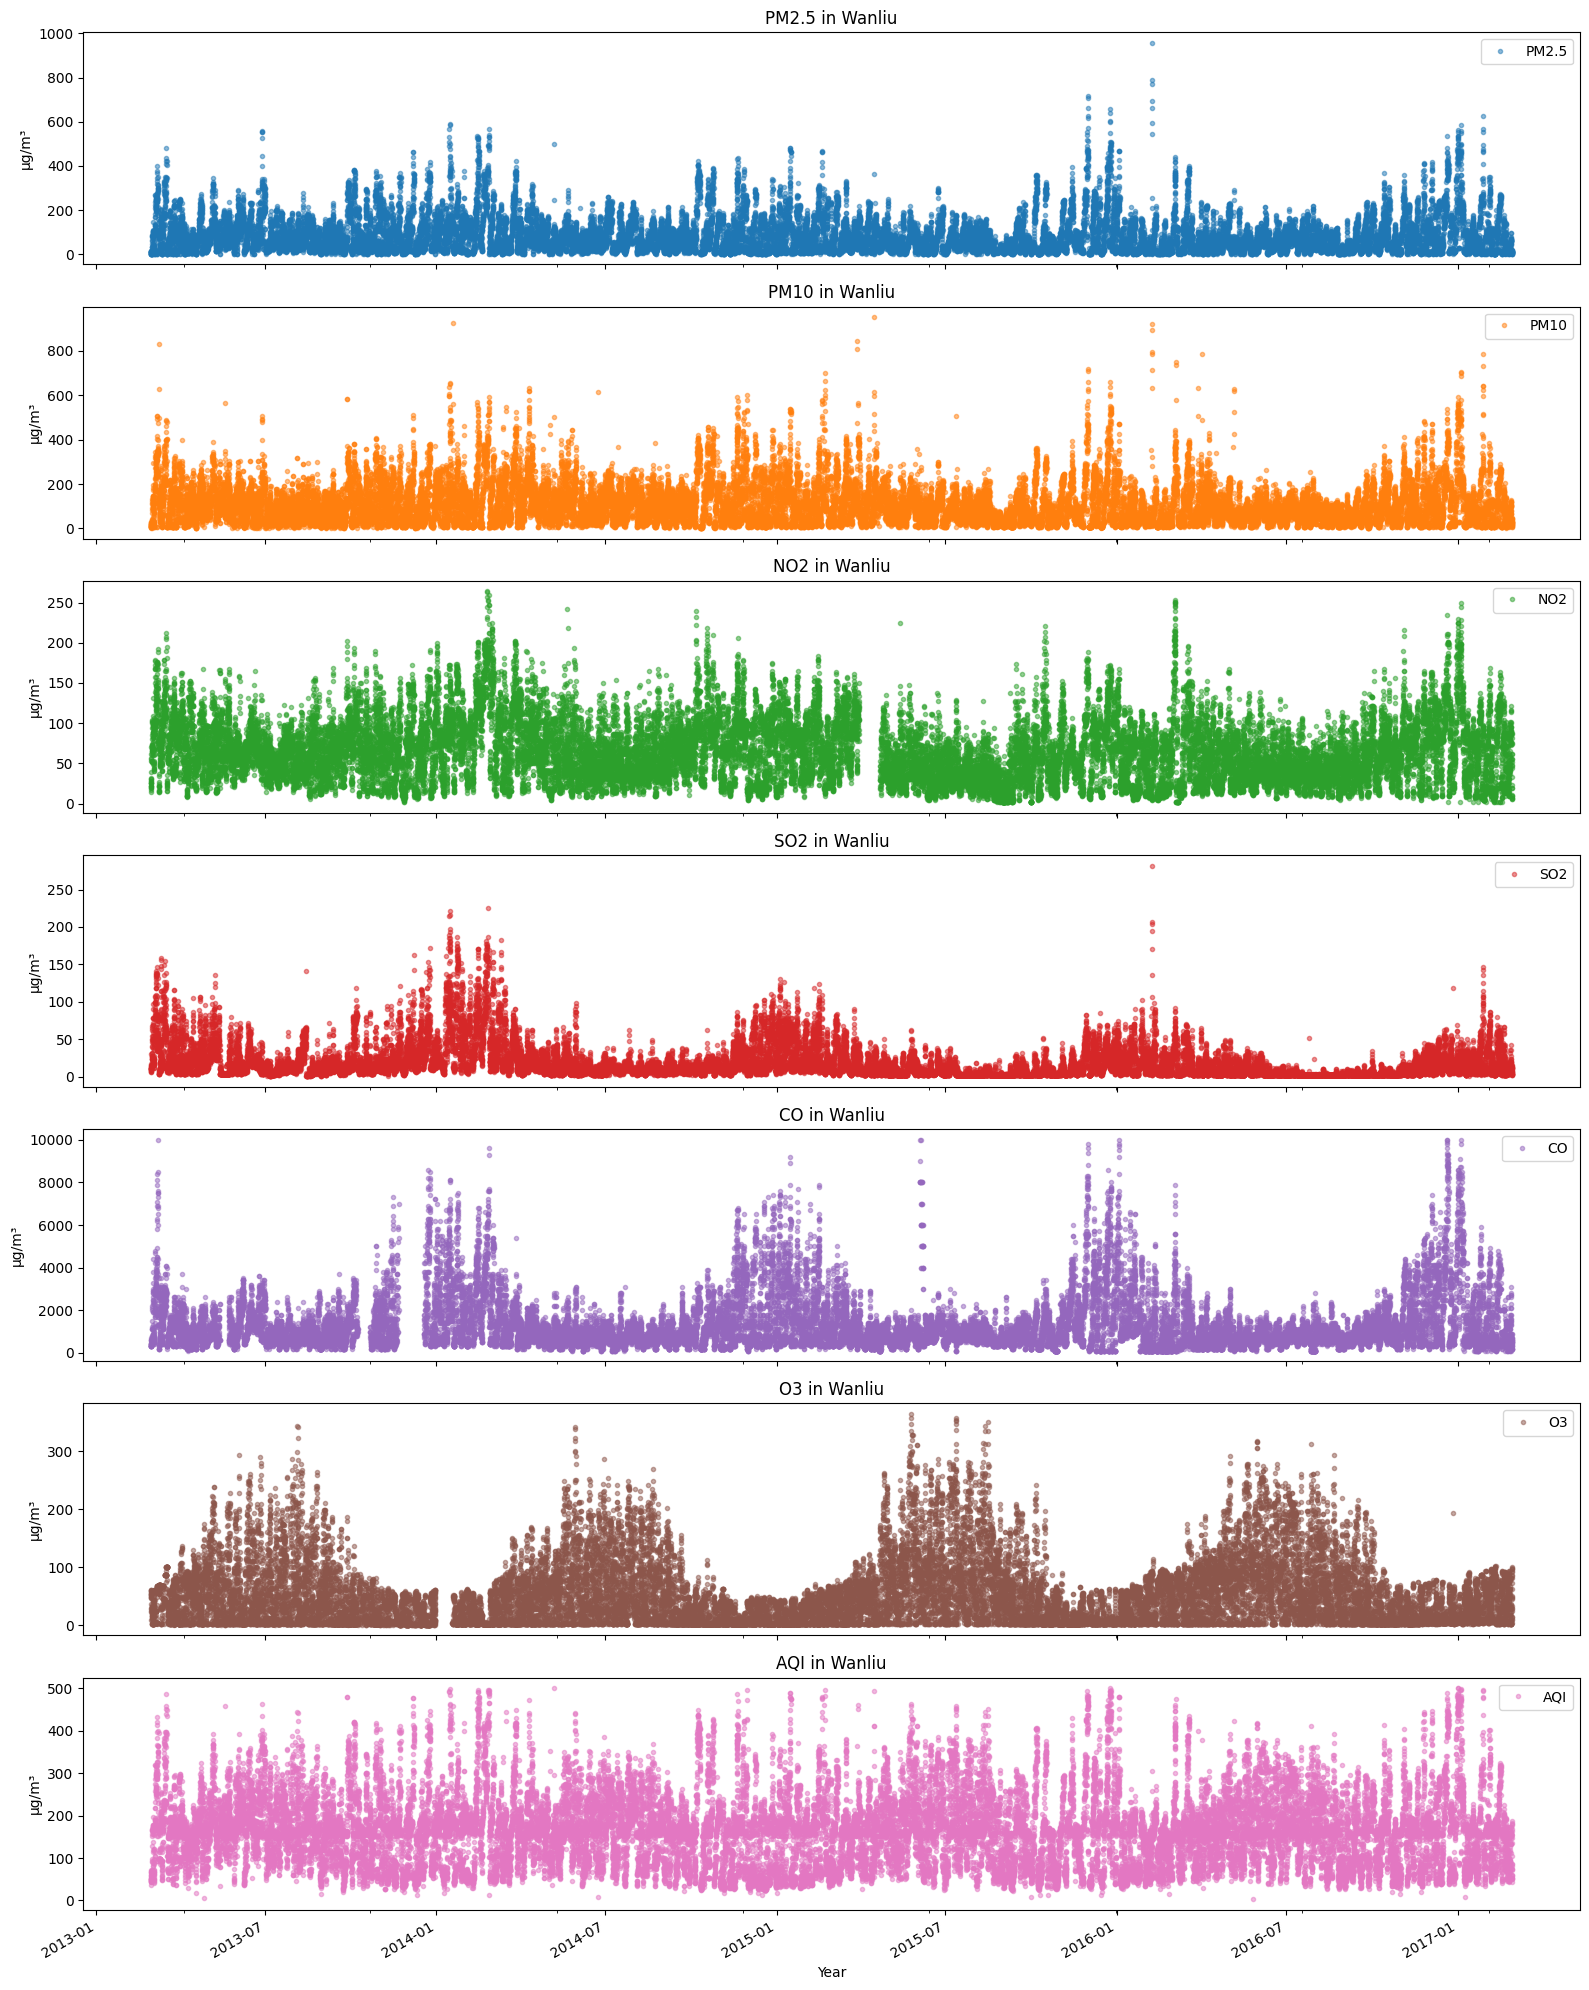

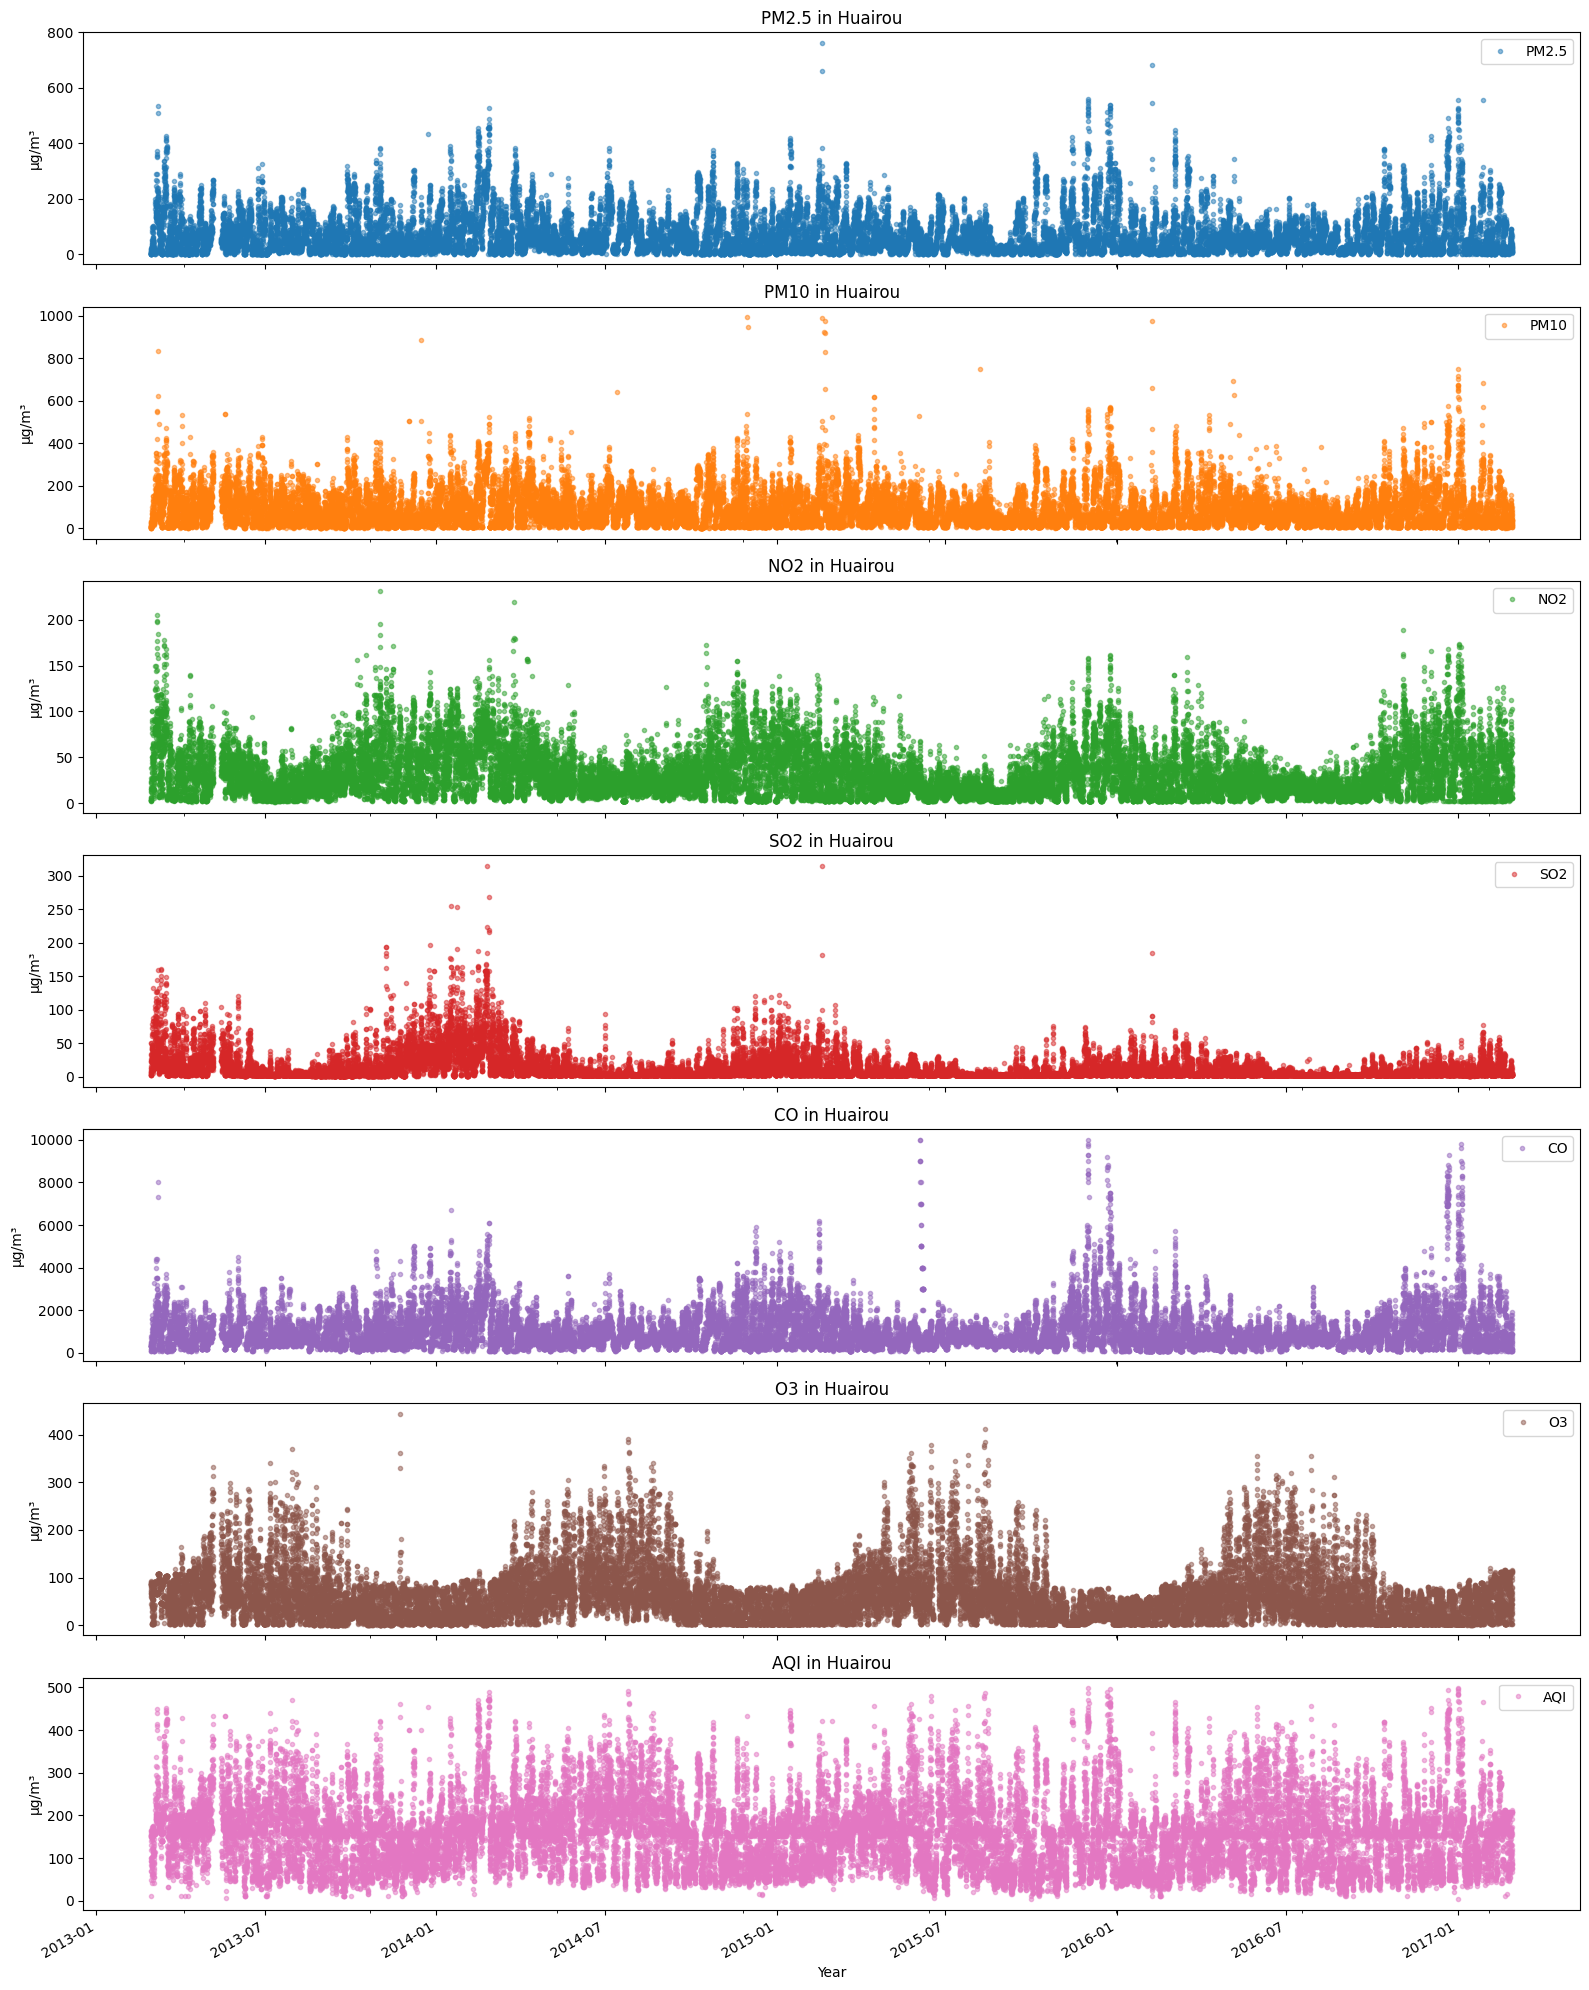

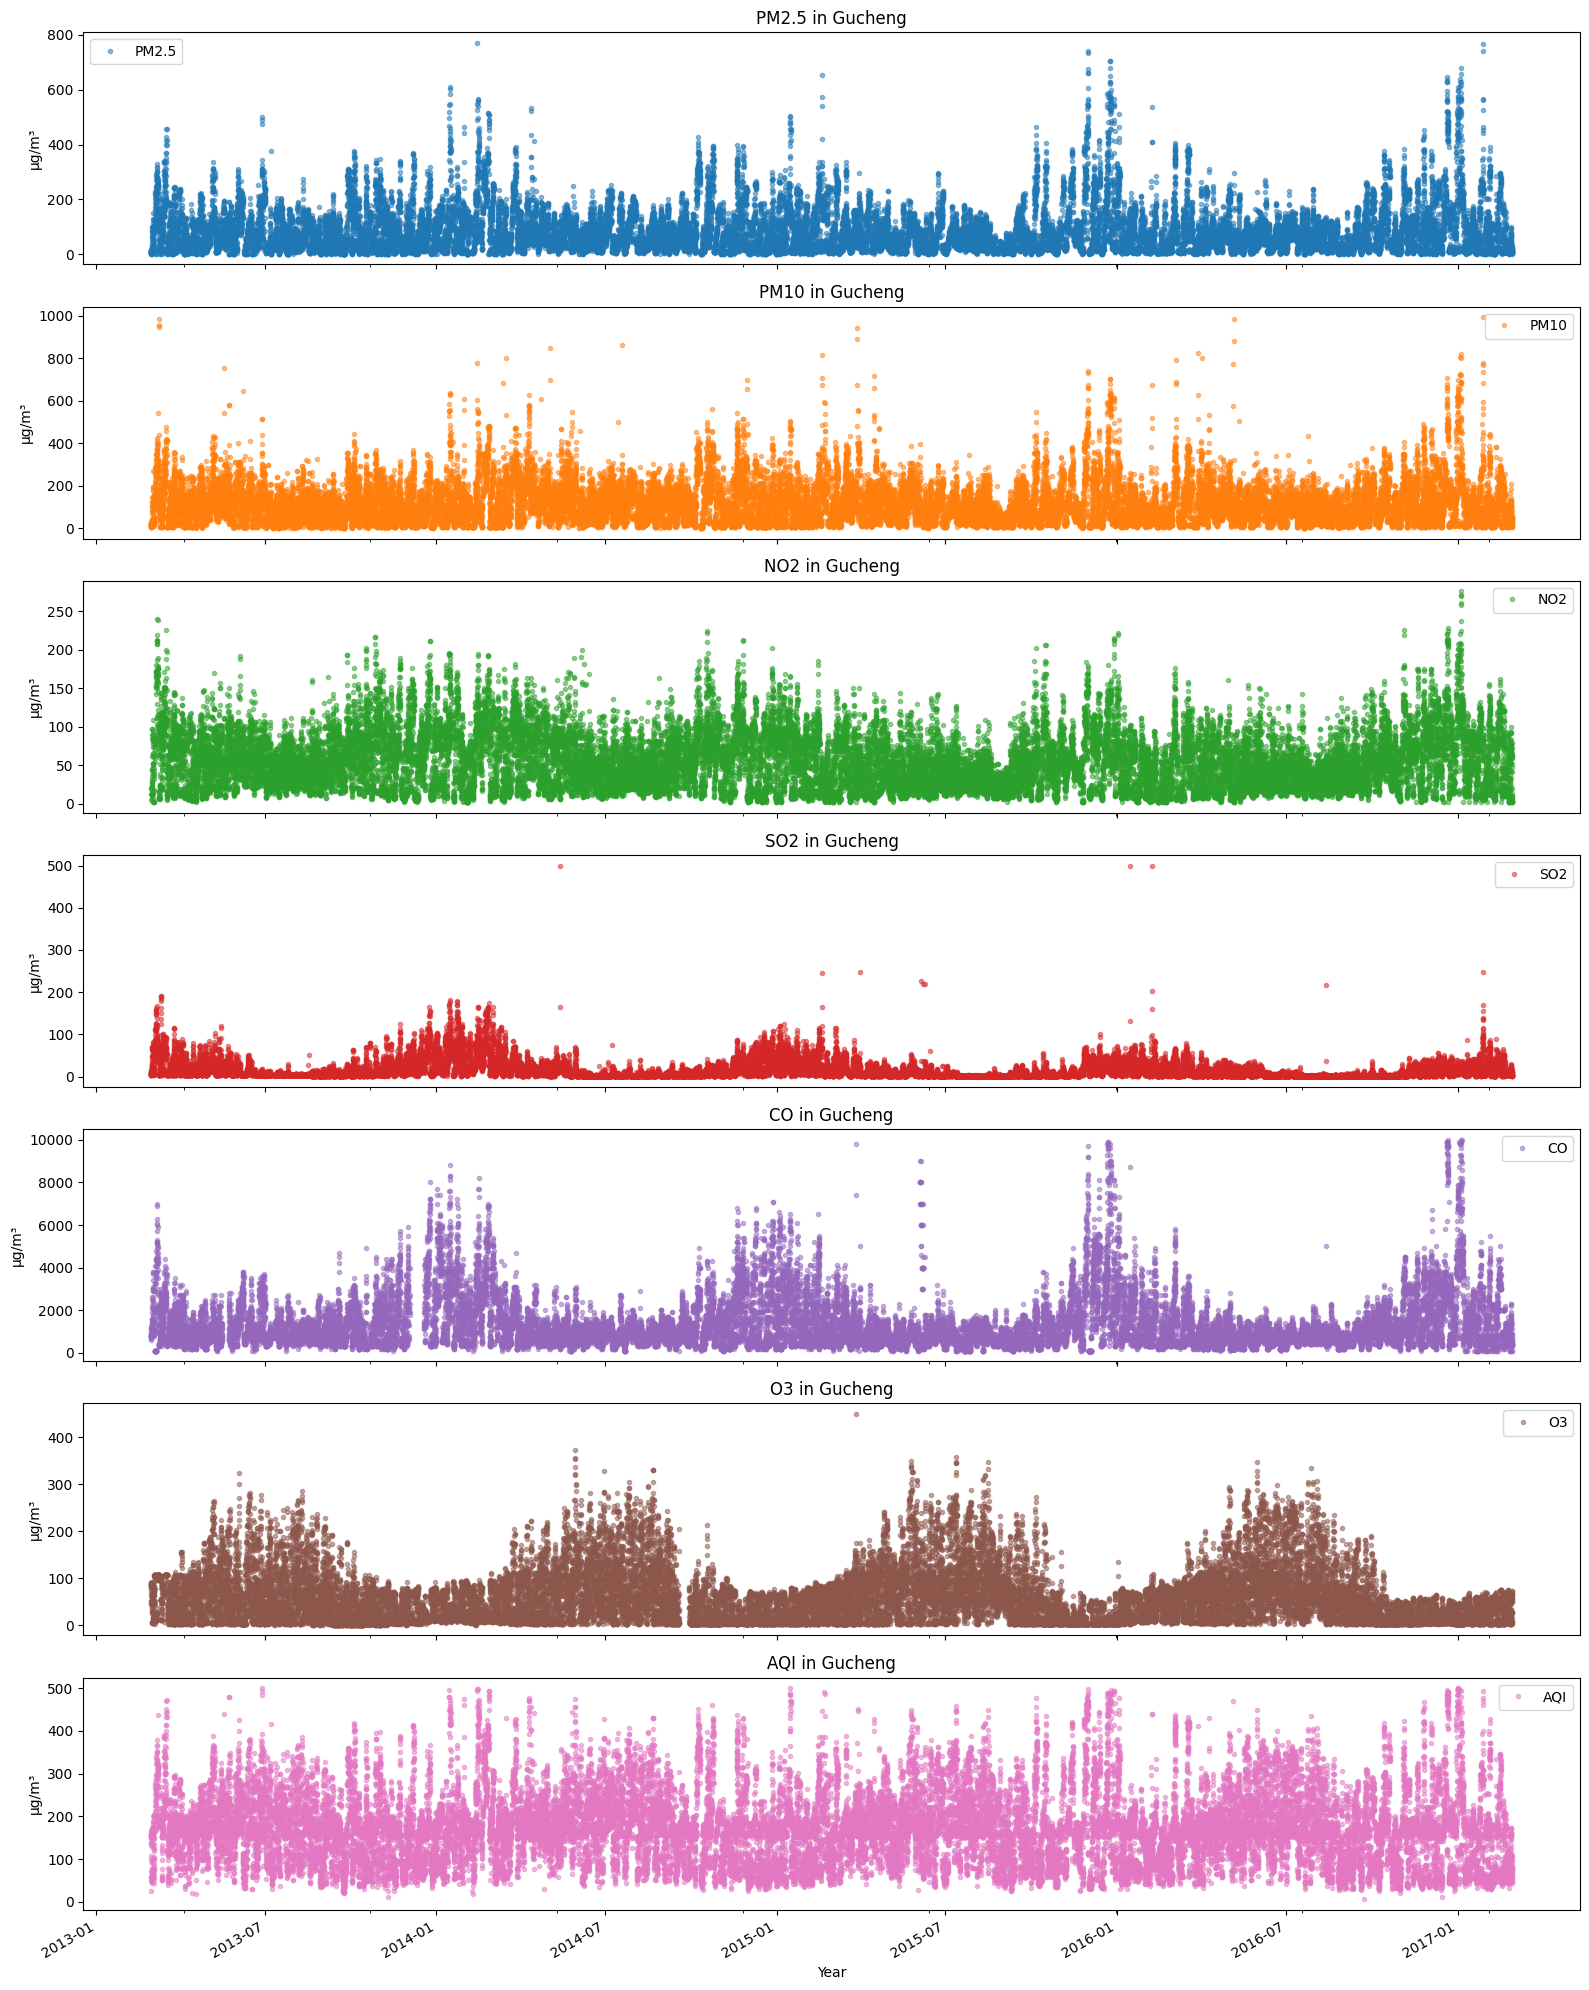

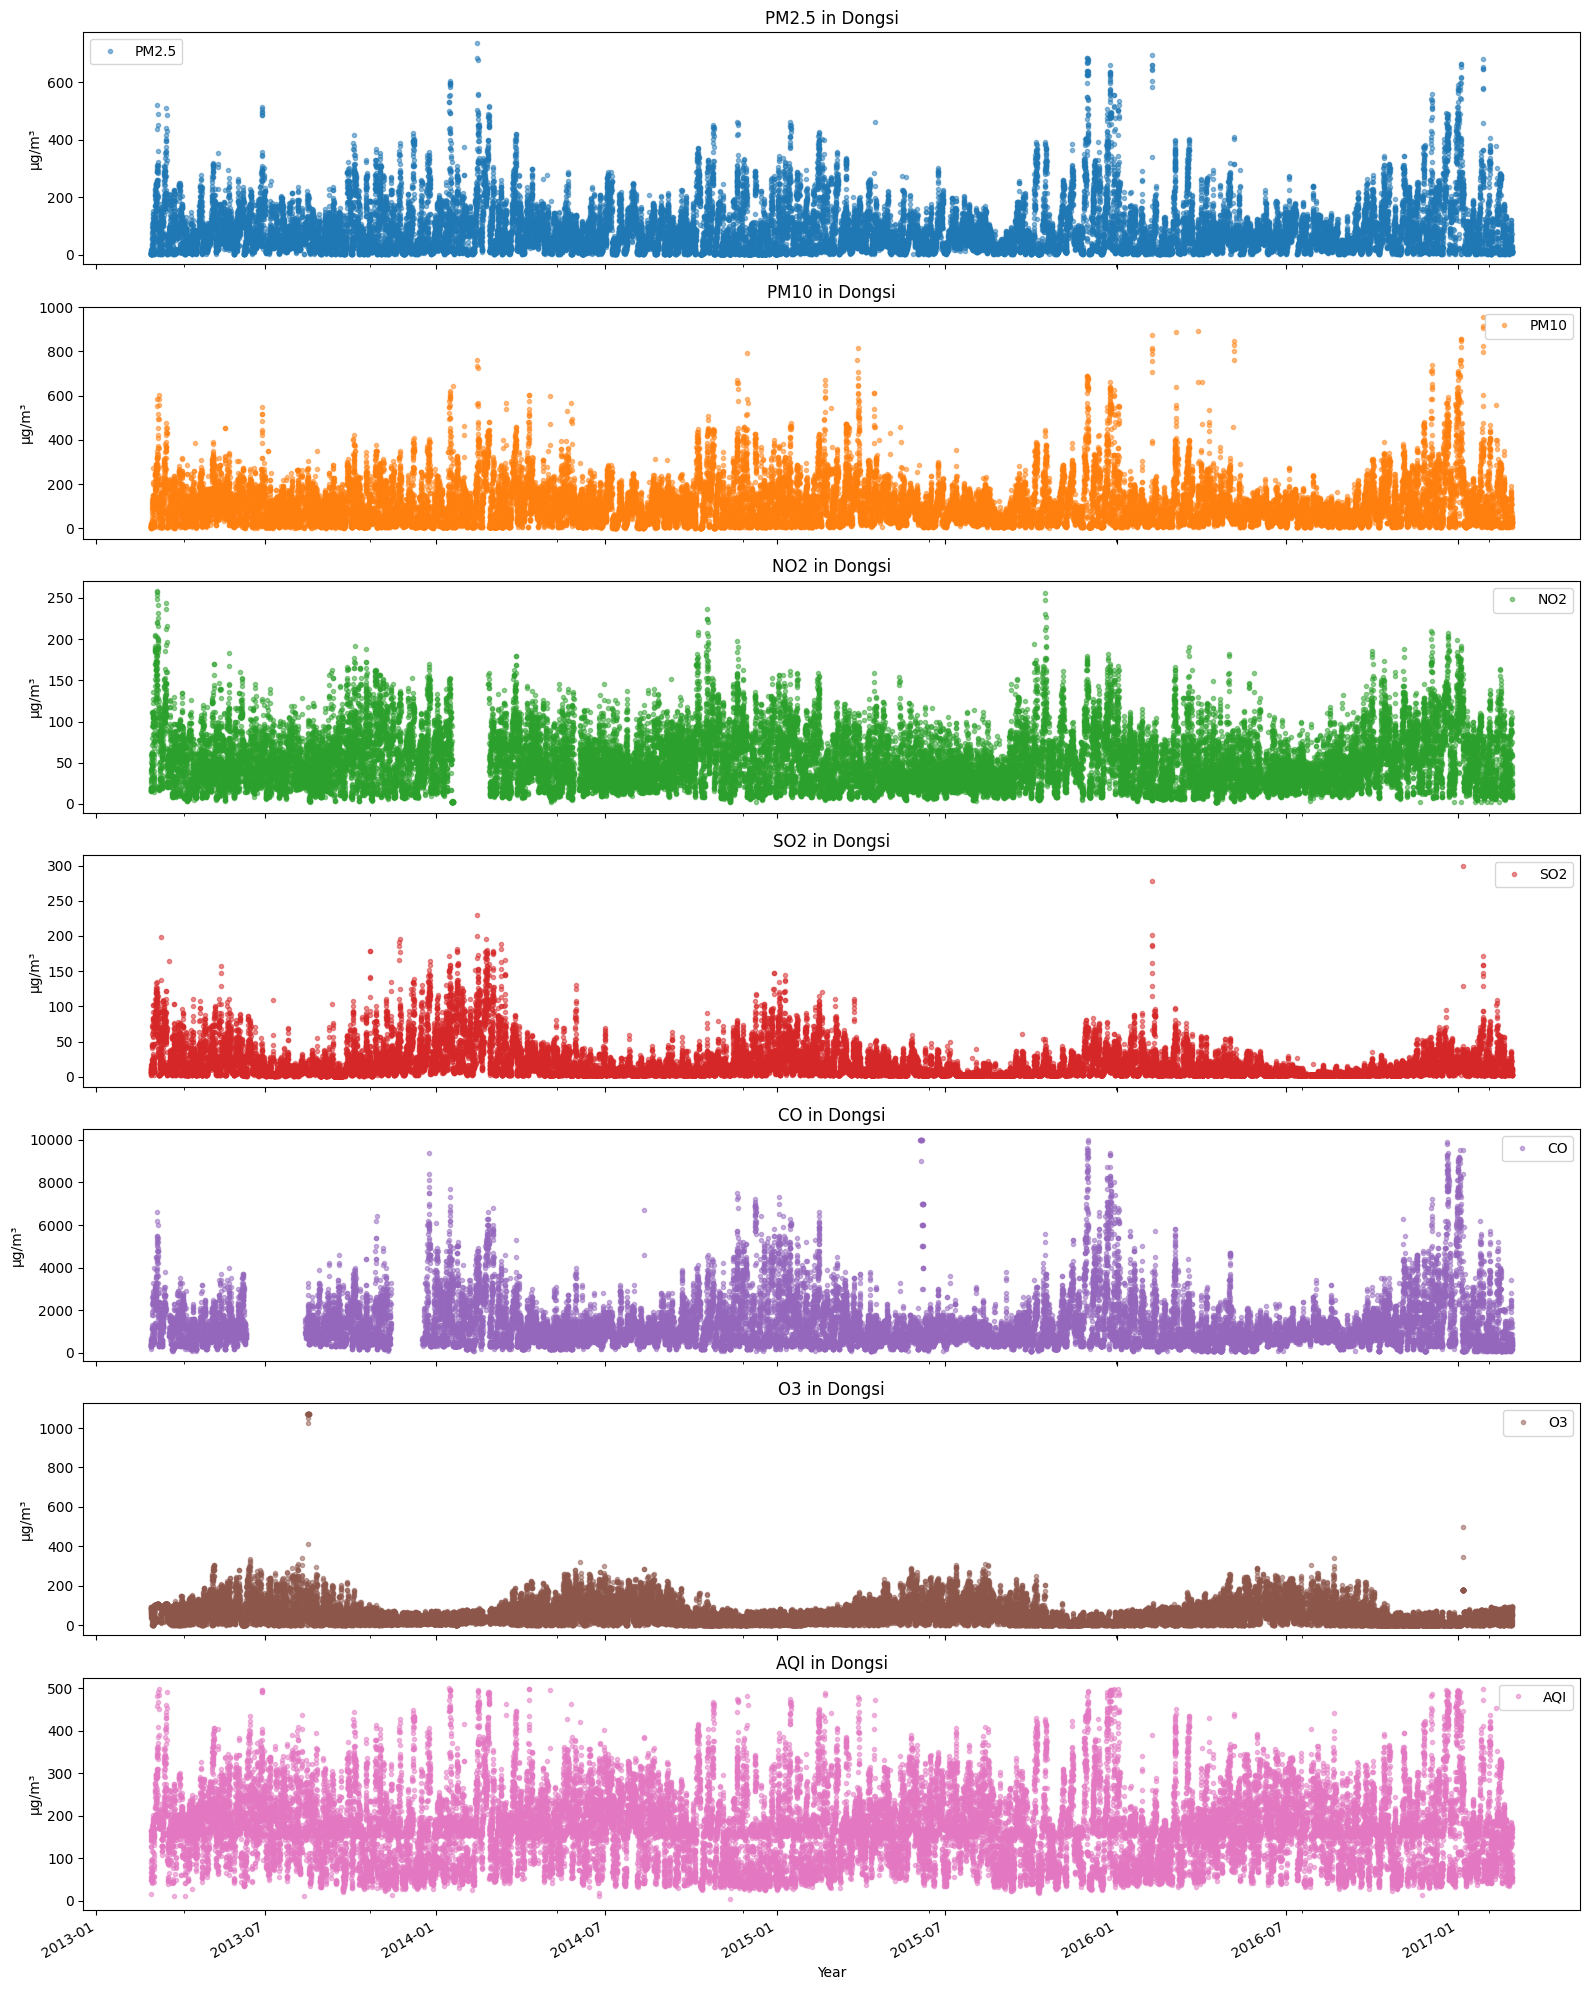

In [167]:
import matplotlib.pyplot as plt

# Ensure 'Date' is a datetime object and set as index
All_Stations_df['Date'] = pd.to_datetime(All_Stations_df['Date'])
All_Stations_df.set_index('Date', inplace=True)

# List of pollutants and cities
pollutants = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'O3','AQI']
cities = All_Stations_df['station'].unique()

# Create subplots for each pollutant per city
for station in cities:
    city_data = All_Stations_df[All_Stations_df['station'] == station]

    axes = city_data[pollutants].plot(
        marker='.',
        alpha=0.5,
        linestyle='None',
        figsize=(16, 20),
        subplots=True,
        title=[f"{pollutant} in {station}" for pollutant in pollutants]
    )

    for ax in axes:
        ax.set_xlabel('Year')
        ax.set_ylabel('µg/m³')

    plt.tight_layout()
    plt.show()


# MONTHWISE PLOTTING

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM', 'SO2', 'NO2', 'CO','O3',]
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
#df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year and month, and calculating mean for each pollutant
df1['Month'] = df1['Date'].dt.to_period('M')
df_monthly = df1.groupby('Month')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Pollutant Levels by Month"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_monthly.index.astype(str),  # Convert PeriodIndex to string for x-axis
            y=df_monthly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Month-wise Pollutant Levels",
    xaxis_title="Month",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


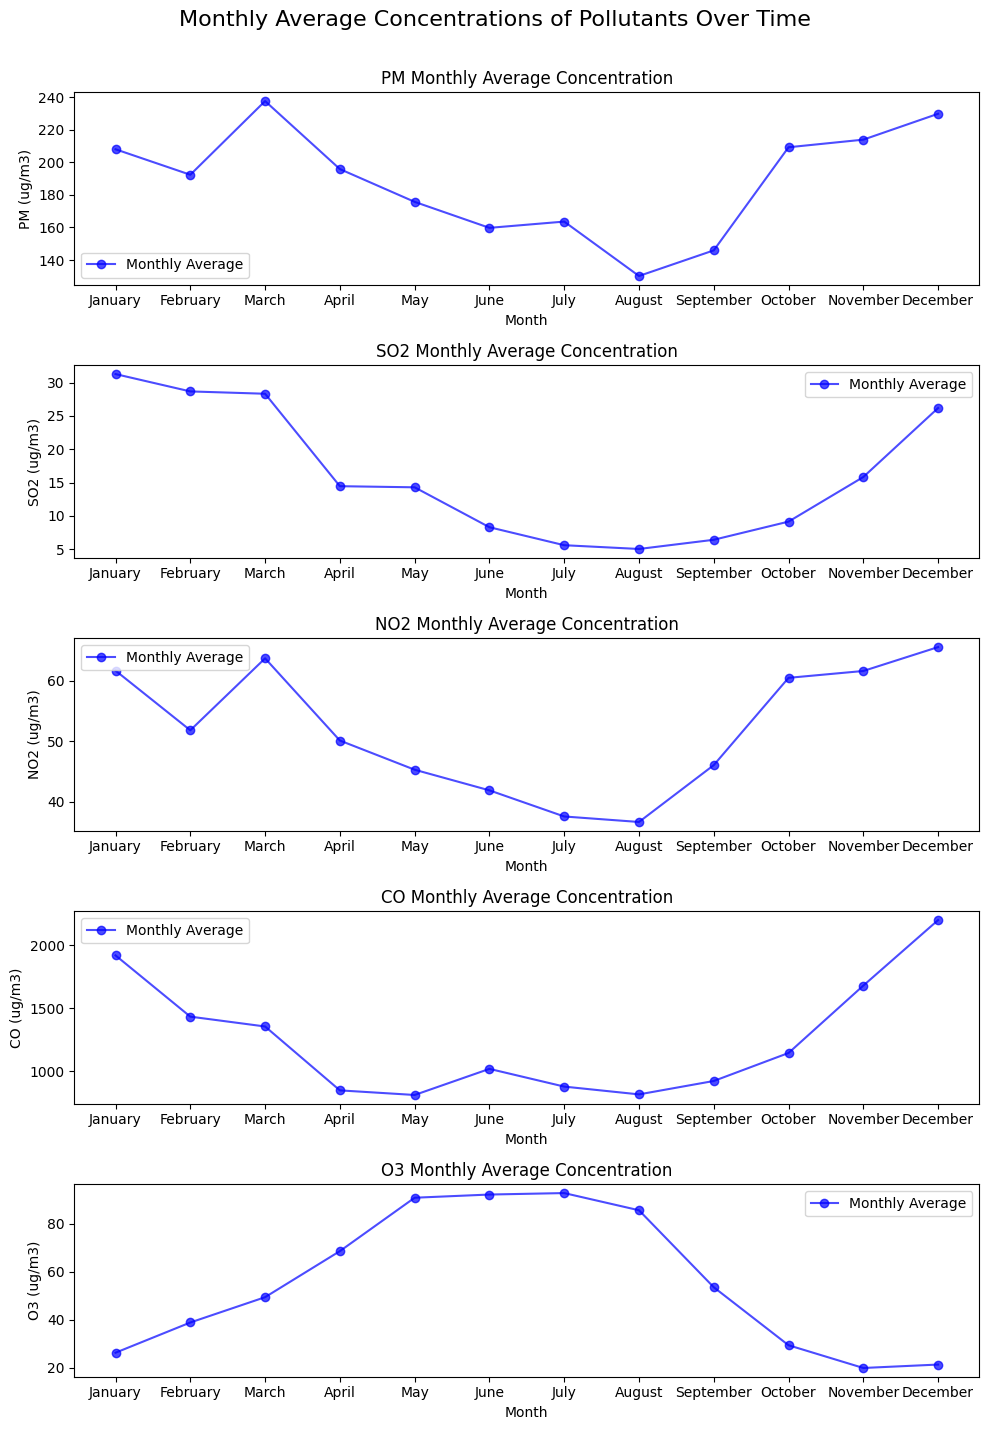

In [ ]:
# Group by Month to calculate the monthly average for each pollutant
monthly_avg = df.groupby('month')[pollutants].mean()

# Plotting the monthly average for each pollutant
fig, axes = plt.subplots(len(pollutants), 1, figsize=(10, 15), sharex=False)

# Define month names for x-axis labels
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

for i, pollutant in enumerate(pollutants):
    ax = axes[i]
    ax.plot(month_names, monthly_avg[pollutant], marker='o', linestyle='-', color='blue', alpha=0.7, label='Monthly Average')
    ax.set_ylabel(f'{pollutant} (ug/m3)')
    ax.set_title(f'{pollutant} Monthly Average Concentration')
    ax.legend()
    ax.set_xlabel('Month')  # Set x-axis label

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

# Set a common title for the figure
fig.suptitle('Monthly Average Concentrations of Pollutants Over Time', fontsize=16)

plt.show()

**POLLUTANTS BY THE YEAR**

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#df1.reset_index(inplace=True)  # Moves 'Date' from index to a column

# Ensure 'Date' column is in datetime type
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')

# Convert pollutant columns to numeric, coercing errors to NaN
pollutant_columns = ['PM', 'NO2', 'SO2', 'CO','O3',]
for col in pollutant_columns:
    df1[col] = pd.to_numeric(df1[col], errors='coerce')

# Remove rows with NaN values (if needed)
df1 = df1.dropna(subset=pollutant_columns)

# Grouping by year, and calculating mean for each pollutant
df1['year'] = df1['Date'].dt.year
df_yearly = df1.groupby('year')[pollutant_columns].mean()

# Create subplots: one for each pollutant
fig = make_subplots(
    rows=1, cols=1,
    shared_xaxes=True,
    vertical_spacing=0.03,
    subplot_titles=["Yearly Pollutant Levels"]
)

# Adding line plot for each pollutant
for pollutant in pollutant_columns:
    fig.add_trace(
        go.Scatter(
            x=df_yearly.index.astype(str),  # Convert Year to string for x-axis
            y=df_yearly[pollutant],
            mode='lines+markers',  # You can change to 'lines' or 'markers' depending on the style
            name=pollutant
        )
    )

# Update layout for better readability
fig.update_layout(
    title="Yearly Pollutant Levels",
    xaxis_title="Year",
    yaxis_title="Pollutant Concentration (µg/m³)",
    height=600,
    showlegend=True
)

# Show plot
fig.show()


CALCULATING AQI

In [ ]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return None

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)
    overall_aqi = max(individual_aqi.values()) if individual_aqi else None
    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI row by row ===
aqi_values = []
for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    aqi_values.append(overall_aqi)

# === Add AQI to DataFrame and save ===
df['AQI'] = aqi_values
df.to_csv("aqi_calculated.csv", index=False)

print("AQI calculated and saved to 'aqi_calculated.csv'")


TypeError: '>' not supported between instances of 'NoneType' and 'int'

In [ ]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return 0  # Return 0 instead of None when concentration is outside breakpoints

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)

    # Handle case where individual_aqi.values() contains only None values
    if individual_aqi and all(val is None for val in individual_aqi.values()):
        overall_aqi = None  # Or assign a default value, e.g., 0
    else:
        overall_aqi = max(val for val in individual_aqi.values() if val is not None) if individual_aqi else None

    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI row by row ===
aqi_values = []
for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    aqi_values.append(overall_aqi)

# === Add AQI to DataFrame and save ===
df['AQI'] = aqi_values
df.to_csv("aqi_calculated.csv", index=False)

print("AQI calculated and saved to 'aqi_calculated.csv'")

AQI calculated and saved to 'aqi_calculated.csv'


In [63]:
import pandas as pd

# === AQI Calculation Functions ===
def calculate_aqi(concentration, breakpoints):
    for Clow, Chigh, Ilow, Ihigh in breakpoints:
        if Clow <= concentration <= Chigh:
            return round((Ihigh - Ilow) / (Chigh - Clow) * (concentration - Clow) + Ilow)
    return 0  # Return 0 instead of None

def classify_aqi(aqi):
    if pd.isna(aqi) or aqi < 0 or aqi > 500:
        return ("Invalid", "Gray", "Invalid AQI value")
    elif aqi <= 50:
        return ("Good", "Green", "Air quality is satisfactory.")
    elif aqi <= 100:
        return ("Moderate", "Yellow", "Acceptable; some pollutants may affect sensitive individuals.")
    elif aqi <= 150:
        return ("Unhealthy for Sensitive Groups", "Orange", "Sensitive people may experience health effects.")
    elif aqi <= 200:
        return ("Unhealthy", "Red", "Everyone may begin to experience health effects.")
    elif aqi <= 300:
        return ("Very Unhealthy", "Purple", "Health alert: serious effects for everyone.")
    else:
        return ("Hazardous", "Maroon", "Emergency conditions: serious risk to health for everyone.")

def aqi_for_all_pollutants(values):
    breakpoints_data = {
        'PM2.5': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300), (250.5, 350.4, 301, 400), (350.5, 500.4, 401, 500)],
        'PM10':  [(0, 54, 0, 50), (55, 154, 51, 100), (155, 254, 101, 150), (255, 354, 151, 200), (355, 424, 201, 300), (425, 504, 301, 400), (505, 604, 401, 500)],
        'NO2':   [(0, 53, 0, 50), (54, 100, 51, 100), (101, 360, 101, 150), (361, 649, 151, 200), (650, 1249, 201, 300), (1250, 1649, 301, 400), (1650, 2049, 401, 500)],
        'SO2':   [(0, 35, 0, 50), (36, 75, 51, 100), (76, 185, 101, 150), (186, 304, 151, 200), (305, 604, 201, 300), (605, 804, 301, 400), (805, 1004, 401, 500)],
        'CO':    [(0.0, 4.4, 0, 50), (4.5, 9.4, 51, 100), (9.5, 12.4, 101, 150), (12.5, 15.4, 151, 200), (15.5, 30.4, 201, 300), (30.5, 40.4, 301, 400), (40.5, 50.4, 401, 500)],
        'O3':    [(0, 54, 0, 50), (55, 70, 51, 100), (71, 85, 101, 150), (86, 105, 151, 200), (106, 200, 201, 300), (201, 300, 301, 400), (301, 400, 401, 500)]
    }

    individual_aqi = {}
    for pollutant, value in values.items():
        bp = breakpoints_data.get(pollutant)
        if bp and pd.notnull(value):
            individual_aqi[pollutant] = calculate_aqi(value, bp)

    if individual_aqi and all(val is None for val in individual_aqi.values()):
        overall_aqi = None
    else:
        overall_aqi = max(val for val in individual_aqi.values() if val is not None) if individual_aqi else None

    return overall_aqi, individual_aqi

# === Load your CSV ===
df = pd.read_csv("combined_output.csv")

# === Calculate AQI and Bucket row by row ===
aqi_values = []
aqi_buckets = []
aqi_colors = []
aqi_messages = []

for _, row in df.iterrows():
    pollutant_values = {
        'PM2.5': row.get('PM2.5'),
        'PM10': row.get('PM10'),
        'NO2': row.get('NO2'),
        'SO2': row.get('SO2'),
        'CO': row.get('CO'),
        'O3': row.get('O3')
    }
    overall_aqi, _ = aqi_for_all_pollutants(pollutant_values)
    bucket, color, message = classify_aqi(overall_aqi)

    aqi_values.append(overall_aqi)
    aqi_buckets.append(bucket)
    aqi_colors.append(color)
    aqi_messages.append(message)

# === Add results to DataFrame and save ===
df['AQI'] = aqi_values
df['AQI_Bucket'] = aqi_buckets
df['AQI_Color'] = aqi_colors
df['AQI_Message'] = aqi_messages

df.to_csv("aqi_calculated.csv", index=False)
print("AQI, categories, colors, and messages saved to 'aqi_calculated.csv'")


KeyboardInterrupt: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv("aqi_calculated.csv")

# Convert date column to datetime (adjust name if needed)
#df['Date'] = pd.to_datetime(df['Date'])

# Optional: sort by date
df = df.sort_values('Date')

# Plot daily AQI
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['AQI'], marker='o', linestyle='-', alpha=0.7)
plt.title("Daily AQI Trend")
plt.xlabel("Date")
plt.ylabel("AQI")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Date'

# CORRELATION

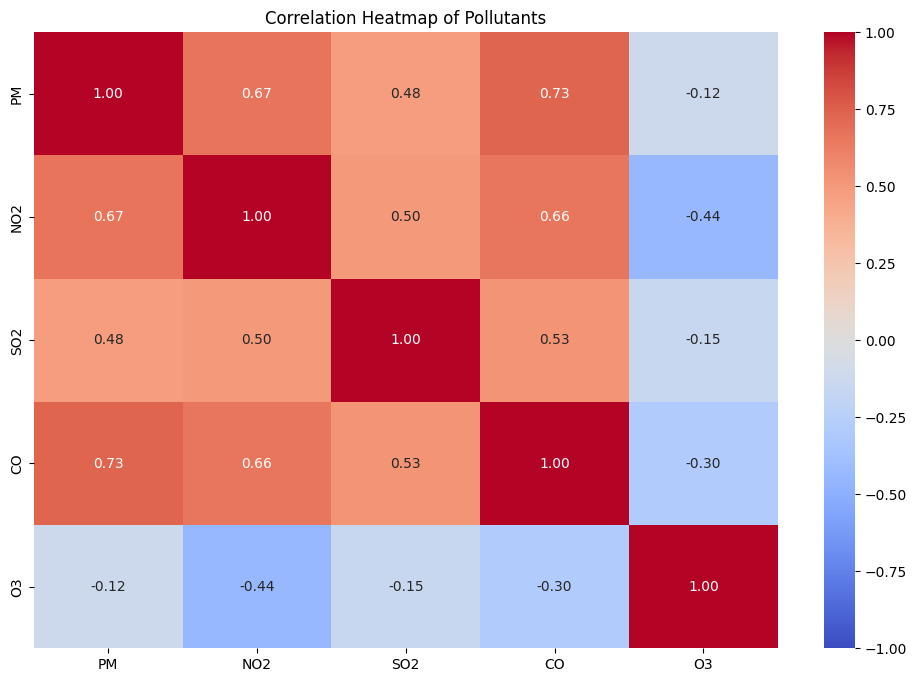

In [ ]:
# Filter the DataFrame to include only numeric columns
# This assumes you want to include only the pollutants columns
pollutants = ['PM', 'NO2', 'SO2', 'CO','O3']
numeric_pollutants_df = df1[pollutants]

# Convert data to numeric (this will handle any non-numeric values)
numeric_pollutants_df = numeric_pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with any NaN values (if any)
numeric_pollutants_df = numeric_pollutants_df

# Calculate the correlation matrix
correlation_matrix = numeric_pollutants_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of Pollutants')
plt.show()


In [ ]:
numeric_pollutants_df.corr()

PM       NO2       SO2        CO        O3
PM   1.000000  0.666812  0.476564  0.729652 -0.123321
NO2  0.666812  1.000000  0.496466  0.663670 -0.438335
SO2  0.476564  0.496466  1.000000  0.525397 -0.153708
CO   0.729652  0.663670  0.525397  1.000000 -0.295855
O3  -0.123321 -0.438335 -0.153708 -0.295855  1.000000

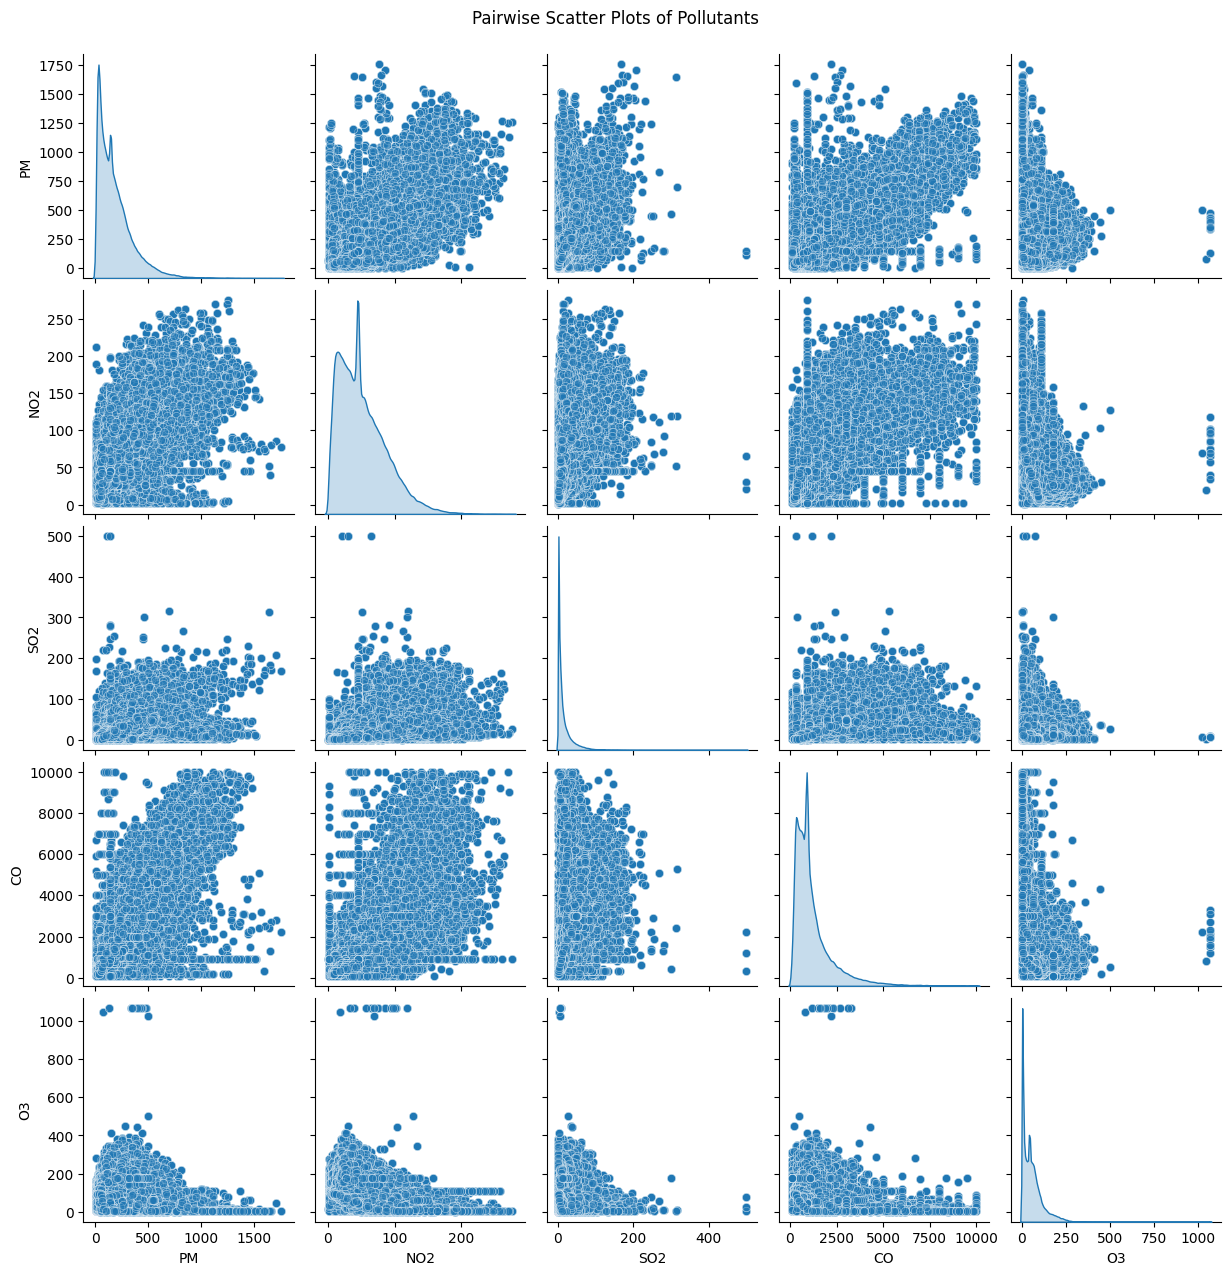

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df1 is your DataFrame and it contains the pollutant columns
pollutants = ['PM', 'NO2', 'SO2', 'CO', 'O3']

# Filter the DataFrame to include only the pollutant columns
pollutants_df = df1[pollutants]

# Ensure all columns are numeric
pollutants_df = pollutants_df.apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values
pollutants_df = pollutants_df.dropna()

# Create scatter plots between each pair of pollutants
# Use pairplot from seaborn to plot all pairwise scatter plots
sns.pairplot(pollutants_df, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pairwise Scatter Plots of Pollutants', y=1.02)
plt.show()